##  Converting Color Images to Grayscale using numpy and some Mathematics

An extremely magnified image at the end is just blocks of colors called pixels, where each pixel is formed by the combination of Red, Blue and Green, our primary colors. RGB color space or RGB color system, constructs all the colors from the combination of the intensities of Red, Green and Blue colors.
![](images/color-image-rgb.png)
![](images/1.png)
If you look at Gray and Silver, you would see that all the components Red, Green and Blue are equal. So the idea behind converting any image to grayscale would be to make Red, Green and Blue value equal in each pixel. Some of the ways you can do this are given below:

### Method 1: The lightness method
This method averages the most prominent and least prominent Colors: 

(max(R, G, B) + min(R, G, B)) / 2
```python
gray_light[:] = np.max(gray_light,axis=-1,keepdims=1)/2 + np.min(gray_light,axis=-1,keepdims=1)/2
```

In [14]:
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

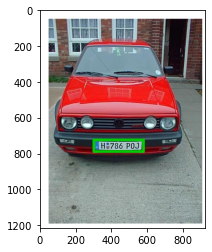

In [15]:
img = mpimg.imread('images/1.jpg')
plt.imshow(img)

In [16]:
img_copy = np.copy(img)

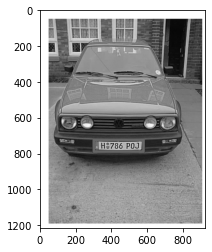

In [18]:
img[:] = np.max(img_copy, axis=-1, keepdims=1)/2 + np.min(img_copy, axis=-1, keepdims=1)/2
plt.imshow(img)

### Method 2: The average method
This method simply averages the values: (R + G + B) / 3
```python
gray_avg[:] = np.sum(gray_avg,axis=-1,keepdims=1)/3
```

### Method 3: The luminosity method
This is a more sophisticated version of the average method. It also averages the values, but it forms a weighted average to account for human perception. We’re more sensitive to green than other colors, so green is weighted most heavily. The formula for luminosity is 0.21 R + 0.72 G + 0.07 B

```python
luminosity_constant = [0.21,0.72,0.07]
gray_lumin = np.dot(orig_img[...,:3], luminosity_constant).astype(np.uint8)
```

### Method 4: Simply use some API 😉
You can use the standard skimage method to perform the same grayscale conversion.
```python
from skimage.color import rgb2gray
img_gray = rgb2gray(orig_img)
```
The algorithm used within rgb2gray is the luminosity method.

# Sobel Feldman operator or Sobel filter
Sobel operator is used in computer vision particularly in edge detection algorithms. The operator uses two 3×3 kernels which are convolved with the original image to calculate the image derivatives – one for horizontal changes, and one for vertical. If we define A as the original image, and Gx and Gy are two images which at each point contain the horizontal and vertical derivative approximations respectively, the computations are as follows:

In [19]:
#Let A denote a grayscale image
A = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

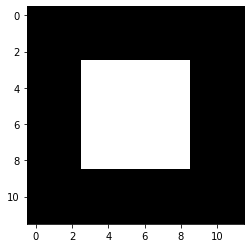

In [26]:
plt.imshow(A, cmap='gray')

Now, we have to find the horizontal and vertical derivative of the input image using the kernels as shown below.
![](images/2.png)
### Convolution process:

In [27]:
from scipy import signal

kernel_horizontal = np.array([[-1, 0, 1], 
                              [-2, 0, 2], 
                              [-1, 0, 1]])

kernel_vertical   = np.array([[1, 2, 1], 
                              [0, 0, 0], 
                              [-1, -2, -1]]) 

Gx = signal.convolve2d(A, kernel_horizontal, boundary='symm', mode='same')
Gy = signal.convolve2d(A, kernel_vertical, boundary='symm', mode='same')

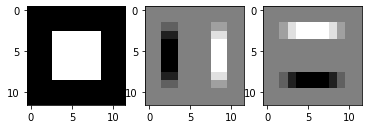

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(A, cmap='gray')
ax2.imshow(Gx, cmap='gray')
ax3.imshow(Gy, cmap='gray')

Now we find the sum of squares of the gradients to get the gradient magnitude.
![](images/3.png)
The above output may not seem like getting us anywhere but when the same is applied to a full real image, this is the output I get.
![](images/4.jpg)
![](images/4.png)

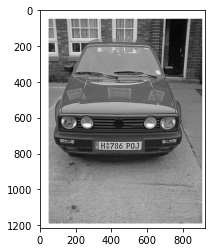

In [50]:
img = mpimg.imread('images/1.jpg')
img[:] = np.sum(img, axis=-1, keepdims=1)/3
plt.imshow(img)

In [52]:
Gx = signal.convolve2d(img[..., 0], kernel_horizontal, boundary='symm', mode='same')
Gy = signal.convolve2d(img[..., 0], kernel_vertical, boundary='symm', mode='same')

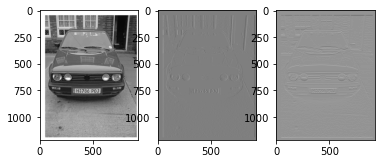

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(img[..., 0], cmap='gray')
ax2.imshow(Gx, cmap='gray')
ax3.imshow(Gy, cmap='gray')

In [59]:
G = np.sqrt(np.square(Gx) + np.square(Gy))

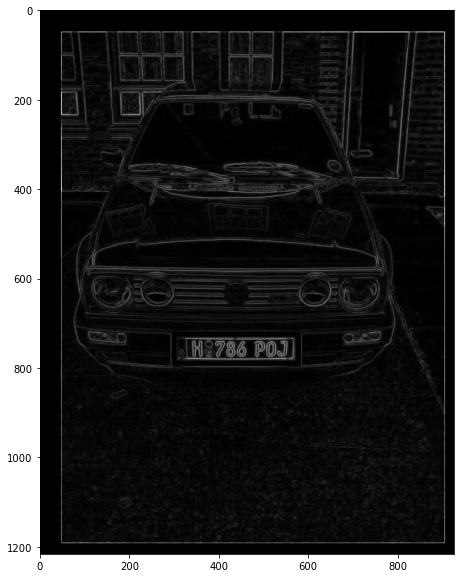

In [65]:
plt.figure(figsize=(10, 10))
plt.imshow(G, cmap='gray')

# Canny Edge Detection Step by Step in Python — Computer Vision

When it comes to image classification, the human eye has the incredible ability to process an image in a couple of milliseconds, and to determine what it is about (label). It is so amazing that it can do it whether it is a drawing or a picture.
![](images/5.png)
The idea today is to build an algorithm that can sketch the edges of any object present on a picture, using the Canny edge detection algorithm.

First of all, let’s describe what is the Canny Edge Detector:

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986. Canny also produced a computational theory of edge detection explaining why the technique works. (Wikipedia)

The Canny edge detection algorithm is composed of 5 steps:
- 1.Noise reduction
- 2.Gradient calculation
- 3.Non-maximum suppression
- 4.Double threshold
- 5.Edge Tracking by Hysteresis
After applying these steps, you will be able to get the following result:
![](images/6.png)
One last important thing to mention, is that the algorithm is based on grayscale pictures. Therefore, the pre-requisite is to convert the image to grayscale before following the above-mentioned steps.

### Noise Reduction
Since the mathematics involved behind the scene are mainly based on derivatives (cf. Step 2: Gradient calculation), edge detection results are highly sensitive to image noise.

One way to get rid of the noise on the image, is by applying Gaussian blur to smooth it. To do so, image convolution technique is applied with a Gaussian Kernel (3x3, 5x5, 7x7 etc…). The kernel size depends on the expected blurring effect. Basically, the smallest the kernel, the less visible is the blur. In our example, we will use a 5 by 5 Gaussian kernel.

The equation for a Gaussian filter kernel of size (2k+1)×(2k+1) is given by:
![](images/7.png)
Python code to generate the Gaussian 5x5 kernel:



In [66]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

After applying the Gaussian blur, we get the following result:
![](images/8.png)

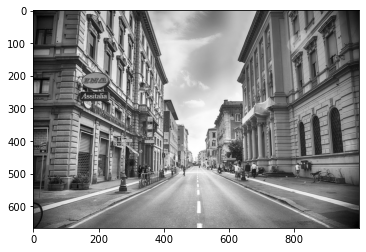

In [97]:
img = mpimg.imread('images/4.jpg')
img[:] = np.sum(img, axis=-1, keepdims=1)/3
plt.imshow(img)

In [98]:
g = gaussian_kernel(5)
g

array([[0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.02153928, 0.09653235, 0.15915494, 0.09653235, 0.02153928],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502]])

In [99]:
gaussian_blur = signal.convolve2d(img[..., 0], g, boundary='symm', mode='same')

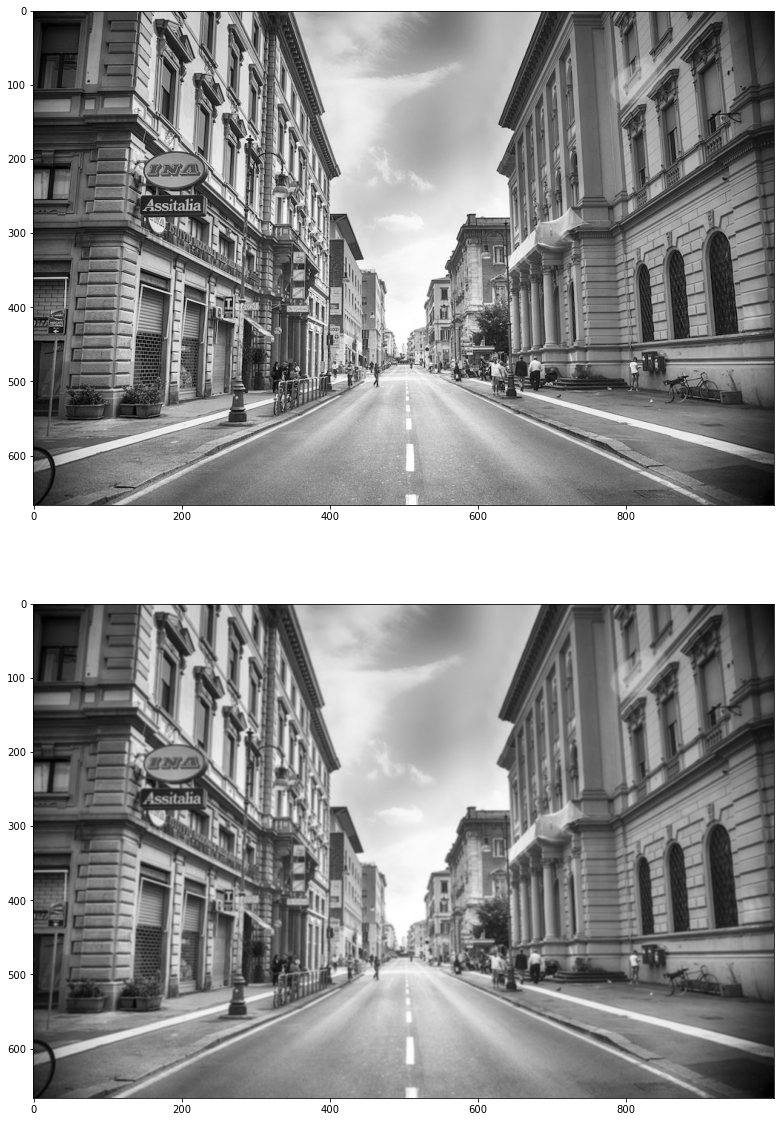

In [101]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20, 20))
ax1.imshow(img[..., 0], cmap='gray')
ax2.imshow(gaussian_blur, cmap='gray')

### Gradient Calculation
The Gradient calculation step detects the edge intensity and direction by calculating the gradient of the image using edge detection operators.

Edges correspond to a change of pixels’ intensity. To detect it, the easiest way is to apply filters that highlight this intensity change in both directions: horizontal (x) and vertical (y)

When the image is smoothed, the derivatives Ix and Iy w.r.t. x and y are calculated. It can be implemented by convolving I with Sobel kernels Kx and Ky, respectively:
![](images/9.png)

In [103]:
from scipy import ndimage

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]], np.float32)
    
    Ky = np.array([[1, 2, 1], 
                   [0, 0, 0], 
                   [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [104]:
G, theta = sobel_filters(gaussian_blur)

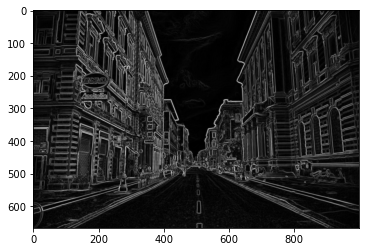

In [106]:
plt.imshow(G, cmap='gray')

![](images/10.png)
The result is almost the expected one, but we can see that some of the edges are thick and others are thin. Non-Max Suppression step will help us mitigate the thick ones.

Moreover, the gradient intensity level is between 0 and 255 which is not uniform. The edges on the final result should have the same intensity (i-e. white pixel = 255).

### Non-Maximum Suppression
Ideally, the final image should have thin edges. Thus, we must perform non-maximum suppression to thin out the edges.

The principle is simple: the algorithm goes through all the points on the gradient intensity matrix and finds the pixels with the maximum value in the edge directions.

Let’s take an easy example: